Data preprocessed using PCA to 150 components.

Calculating inertia for the Elbow Method...


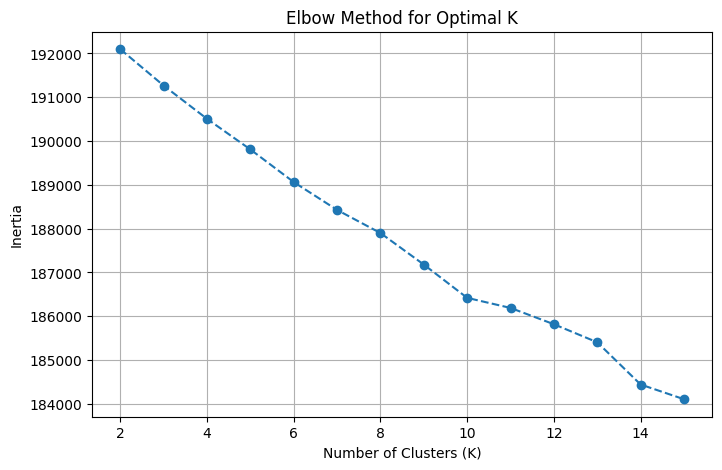


Selected optimal K = 7

--- Performance Metrics ---
Silhouette Score: -0.001
Adjusted Rand Index (ARI): 0.005
Homogeneity Score: 0.025

Visualizing cluster centroids...


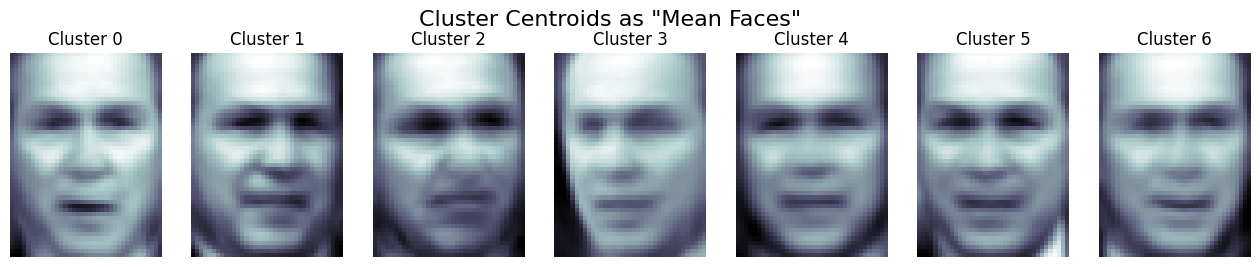

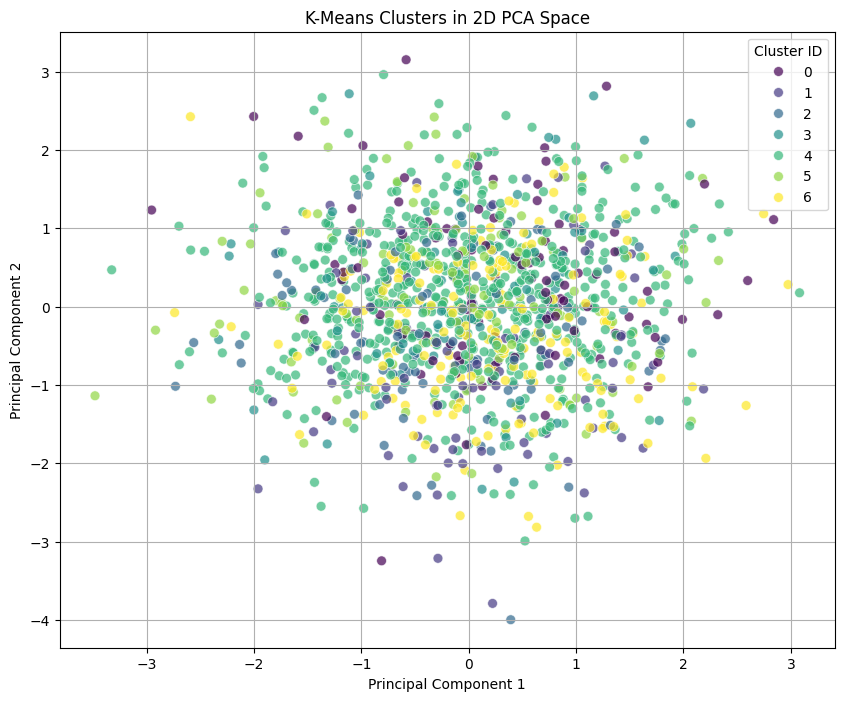

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import fetch_lfw_people
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score, homogeneity_score

# 1. Load & Preprocess Data (using only X for clustering)
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
X = lfw_people.data
y = lfw_people.target # Ground truth labels, used ONLY for evaluation
n_features = X.shape[1]

# Apply PCA for dimensionality reduction
n_components = 150
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X)
X_pca = pca.transform(X)
print(f"Data preprocessed using PCA to {n_components} components.")


# 2. Find Optimal K using the Elbow Method
print("\nCalculating inertia for the Elbow Method...")
inertia = []
k_range = range(2, 16)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

# Based on the elbow plot, K=7 or K=8 seems reasonable (matching the number of people)
optimal_k = 7
print(f"\nSelected optimal K = {optimal_k}")

# 3. Instantiate & Train Model
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)


# 4. Output - Performance Metrics & Visualizations
print("\n--- Performance Metrics ---")
silhouette_avg = silhouette_score(X_pca, clusters)
ari = adjusted_rand_score(y, clusters)
homogeneity = homogeneity_score(y, clusters)

print(f"Silhouette Score: {silhouette_avg:.3f}")
print(f"Adjusted Rand Index (ARI): {ari:.3f}")
print(f"Homogeneity Score: {homogeneity:.3f}")


# Visualize Cluster Centroids as Faces
print("\nVisualizing cluster centroids...")
fig, ax = plt.subplots(1, optimal_k, figsize=(16, 3))
centers_pca = kmeans.cluster_centers_
centers_img = pca.inverse_transform(centers_pca) # Transform centroids back to image space

for i in range(optimal_k):
    ax[i].imshow(centers_img[i].reshape(lfw_people.images.shape[1:]), cmap='bone')
    ax[i].set_title(f'Cluster {i}')
    ax[i].axis('off')
plt.suptitle('Cluster Centroids as "Mean Faces"', fontsize=16)
plt.show()

# Visualize Clusters in 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', alpha=0.7, s=50)
plt.title('K-Means Clusters in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()